# Correlations Between Two Time Series

In [2]:
import SignalSnap as snp
import numpy as np
import matplotlib.pyplot as plt

As a simple example for the usage of correlating two time series we are going to simulate a circular motion of a point on a plane (let's say the x-y-plane). We are going to show that the direction of rotation will be deducible from the imaginary part of the power spectrum ($S^{(2)}$) at the rotation frequency $\omega_0$. Our first and second time series are the current x and y position of the point, respectively. To simulate such time series we make use of the complex plane. We are starting with normal distributed complex noise, which is then filtered with a complex filter to achieve a stochastic rotation in the complex plane with a frequency $\omega_0$. We are also introducing a damping constant $\gamma$ to counteract the constant energy increase of the point due to noise driving term.

In [3]:
# ------- creat complex noise --------
t_array = np.arange(0, 1e6, 1) # in s
dt = t_array[1] - t_array[0]
f_max = 1 / dt / 2
print('f_Nyquist =', f_max, 'Hz')

white_noise_real = np.random.normal(size=len(t_array))
white_noise_imag = 1j * np.random.normal(size=len(t_array))

noise = white_noise_real + white_noise_imag

# ------- filter noise ---------
def dydt(y, t, omega_0, gamma, noise):
    return + 1j * omega_0 * y - gamma * y + noise[int(t)] / 10

y0 = 0
omega_0 = 0.03
gamma = 0.001

# ------- integrate with euler method --------
y = 1j * np.empty_like(t_array)
y[0] = y0
for i in range(1, len(t_array)):
    y[i] = y[i-1] + dt * dydt(y[i-1], t_array[i-1], omega_0, gamma, noise)

f_Nyquist = 0.5 Hz


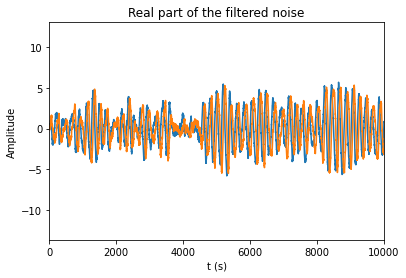

In [9]:
plt.plot(t_array, np.real(y), alpha=1)
plt.plot(t_array, np.imag(y), alpha=1)
plt.xlim([0,1e4])
plt.xlabel('t (s)')
plt.ylabel('Amplitude')
plt.title('Real part of the filtered noise')
plt.show()

In [5]:
spec = snp.Spectrum(data=np.real(y), corr_data=np.imag(y), delta_t=dt, f_unit='Hz')

Actual T_window: 10000.0
Maximum frequency: 0.5
Number of points: 101


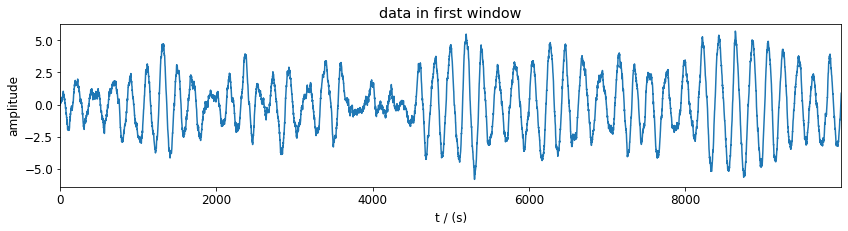

chunk shape:  10000


In [6]:
T_window = 1e4 # these are now ms since the unit of choice are kHz
f_max = 0.01 # kHz
f, s, serr = spec.calc_spec(order_in=[2,3,4], T_window=T_window, f_max=f_max, backend='cpu')

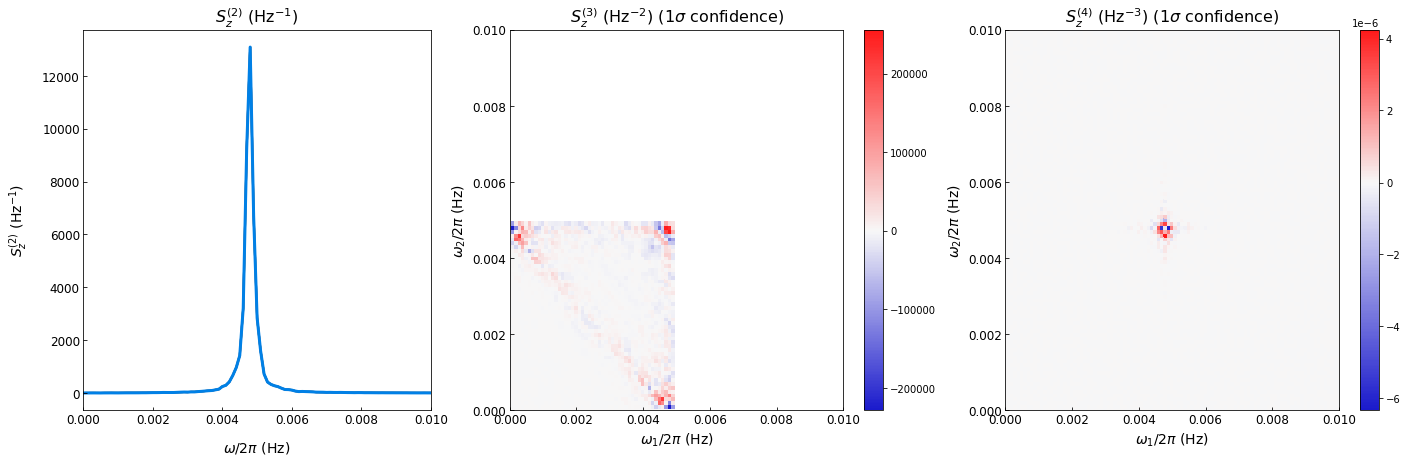

In [7]:
fig = spec.plot(imag_plot=True)